ANALISIS DE DATOS TIENTAS MINORISTAS


In [18]:
import pandas as pd
import pandas as pd

stores = pd.read_csv('C:\\Users\\jhgel\\OneDrive\\Escritorio\\jupyter notebook\\Stores.csv')
features = pd.read_csv('C:\\Users\\jhgel\\OneDrive\\Escritorio\\jupyter notebook\\Features.csv')
sales = pd.read_csv('C:\\Users\\jhgel\\OneDrive\\Escritorio\\jupyter notebook\\Sales.csv')



analisis exploratorio

In [14]:
stores.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


ventas totales por tienda


In [17]:
sales_by_store = sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(sales_by_store)


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


IMPACTO DE LAS SEMANAS FESTIVAS EN LAS VENTAS

In [19]:
holiday_sales = sales[sales['IsHoliday'] == True]['Weekly_Sales'].sum()
non_holiday_sales = sales[sales['IsHoliday'] == False]['Weekly_Sales'].sum()

print("Ventas durante semanas festivas:", holiday_sales)
print("Ventas durante semanas no festivas:", non_holiday_sales)


Ventas durante semanas festivas: 505299551.56
Ventas durante semanas no festivas: 6231919435.55


PROMEDIO DE VENTAS POR TEMPERATURA

In [20]:
merged_data = pd.merge(sales, features, on=['Store', 'Date'])
avg_sales_by_temp = merged_data.groupby('Temperature')['Weekly_Sales'].mean()

print(avg_sales_by_temp)


Temperature
-2.06       8087.358986
 5.54      12021.840294
 6.23      15696.683188
 7.46       8606.890725
 9.51      11084.434714
               ...     
 99.20      5199.964348
 99.22     13225.002703
 99.66      4939.496250
 100.07     6472.901957
 100.14     6384.950909
Name: Weekly_Sales, Length: 3528, dtype: float64


*Las condiciones climáticas influyen en el comportamiento del consumidor.
*Temperaturas extremas (muy bajas o muy altas) reducen la actividad comercial, mientras que temperaturas moderadas pueden coincidir con mejores condiciones de compra.
*Promociones o eventos específicos durante semanas con temperaturas moderadas podrían explicar los picos en ventas (por ejemplo, cerca de festividades).

VISUALIZACIONES


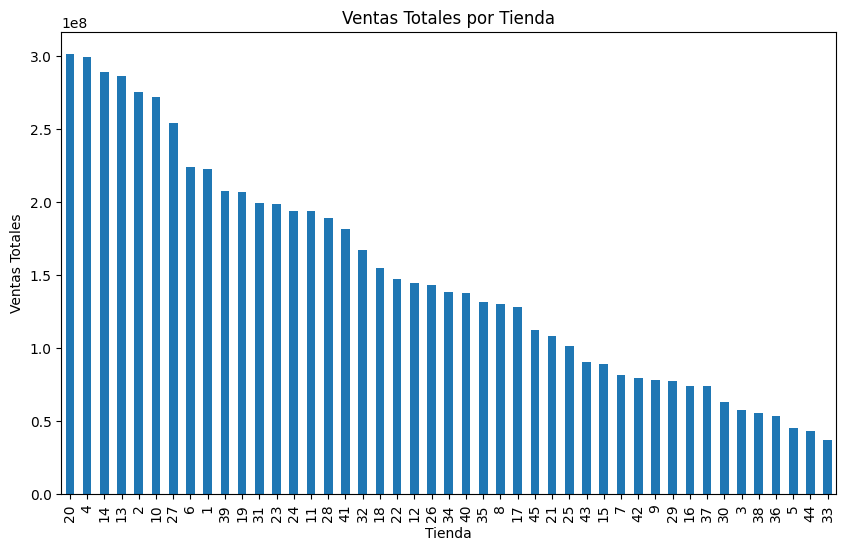

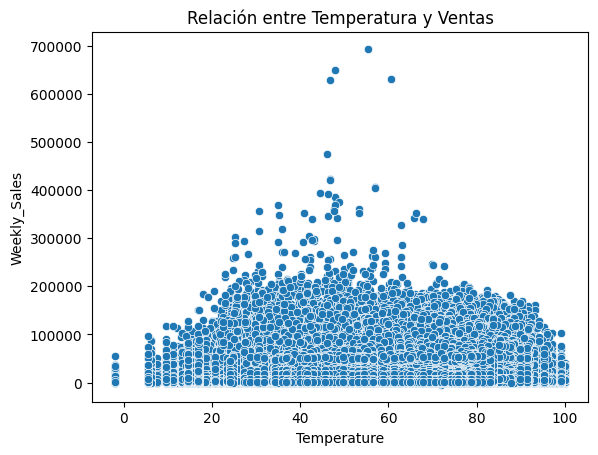

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ventas totales por tienda
sales_by_store.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.show()

# Relación entre temperatura y ventas
sns.scatterplot(data=merged_data, x='Temperature', y='Weekly_Sales')
plt.title('Relación entre Temperatura y Ventas')
plt.show()
